In [0]:
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab1/get_lab.py
%run get_lab.py

--2020-03-24 23:48:34--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab1/get_lab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497 [text/plain]
Saving to: ‘get_lab.py’

get_lab.py          100%[===================>]     497  --.-KB/s    in 0s      

2020-03-24 23:48:35 (107 MB/s) - ‘get_lab.py’ saved [497/497]

enter phystech e-mail
samohin.vyu@phystech.edu
Your tasks are 1.1, 2.3, 3.2, 4.1


In [0]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Задача 1.1

Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:

* Нормальное
* Лапласа
* Стьюдента
* Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)




In [0]:
def get_samples(n, d='normal'):
  mu = np.random.randint(-100, 100)
  sigma = np.random.randint(1, 100)
  
  if d=='normal':
    return st.norm.rvs(loc=mu, scale=sigma, size=n)
  elif d=='laplace':
    return st.laplace.rvs(loc=mu, scale=sigma, size=n)
  elif d=='student_small':
    k = np.random.randint(1, 10)
    return st.t.rvs(df=k, size=n)
  elif d=='student_big':
    k = np.random.randint(50, 100)
    return st.t.rvs(df=k, size=n)
  elif d=='truncated_normal':
    return st.truncnorm.rvs(a=-2, b=2, loc=mu, scale=sigma, size=n)



In [0]:
## Лиллиефорса
from statsmodels.stats.diagnostic import lilliefors
distributions = ['normal', 'laplace', 'student_small', 'student_big', 'truncated_normal']

num_exp = 1000
alpha = 0.05

for d in distributions:
  if d == 'normal':
      print('Ошибка первого рода (распределение {}) равна '.format(d), end=' ')
  else:
      print('Мощность (распределение {}) равна '.format(d), end=' ')
  for n in range(10, 900, 30):
    counter = 0
    for _ in range(num_exp):
      samples = get_samples(n, d)
      if lilliefors(samples, dist='norm', pvalmethod='approx')[1] <= alpha:
        #reject
        counter += 1
    print('{} ({})'.format(counter/num_exp, n), end=' ')
  print('\n')
    

    


Ошибка первого рода (распределение normal) равна  0.052 (10) 0.055 (40) 0.047 (70) 0.049 (100) 0.046 (130) 0.053 (160) 0.045 (190) 0.056 (220) 0.05 (250) 0.048 (280) 0.043 (310) 0.036 (340) 0.05 (370) 0.045 (400) 0.045 (430) 0.057 (460) 0.055 (490) 0.058 (520) 0.046 (550) 0.041 (580) 0.043 (610) 0.052 (640) 0.042 (670) 0.053 (700) 0.043 (730) 0.046 (760) 0.056 (790) 0.038 (820) 0.049 (850) 0.042 (880) 

Мощность (распределение laplace) равна  0.141 (10) 0.375 (40) 0.55 (70) 0.712 (100) 0.806 (130) 0.904 (160) 0.931 (190) 0.965 (220) 0.984 (250) 0.987 (280) 0.991 (310) 0.996 (340) 0.999 (370) 1.0 (400) 1.0 (430) 1.0 (460) 1.0 (490) 1.0 (520) 1.0 (550) 1.0 (580) 1.0 (610) 1.0 (640) 1.0 (670) 1.0 (700) 1.0 (730) 1.0 (760) 1.0 (790) 1.0 (820) 1.0 (850) 1.0 (880) 

Мощность (распределение student_small) равна  0.178 (10) 0.33 (40) 0.408 (70) 0.467 (100) 0.5 (130) 0.52 (160) 0.58 (190) 0.622 (220) 0.64 (250) 0.677 (280) 0.65 (310) 0.682 (340) 0.723 (370) 0.746 (400) 0.753 (430) 0.763 (460) 0

In [0]:
## Харке-Бер

for d in distributions:
  if d == 'normal':
      print('Ошибка первого рода (распределение {}) равна '.format(d), end=' ')
  else:
      print('Мощность (распределение {}) равна '.format(d), end=' ')
  for n in range(10, 900, 30):
    counter = 0
    for _ in range(num_exp):
      samples = get_samples(n, d)
      if st.jarque_bera(samples)[1] <= alpha:
        #reject
        counter += 1
    print('{} ({})'.format(counter/num_exp, n), end=' ')
  print('\n')

Ошибка первого рода (распределение normal) равна  0.006 (10) 0.043 (40) 0.035 (70) 0.047 (100) 0.044 (130) 0.045 (160) 0.038 (190) 0.043 (220) 0.051 (250) 0.048 (280) 0.05 (310) 0.047 (340) 0.043 (370) 0.055 (400) 0.04 (430) 0.046 (460) 0.057 (490) 0.05 (520) 0.056 (550) 0.051 (580) 0.035 (610) 0.051 (640) 0.049 (670) 0.041 (700) 0.052 (730) 0.041 (760) 0.061 (790) 0.035 (820) 0.054 (850) 0.06 (880) 

Мощность (распределение laplace) равна  0.068 (10) 0.449 (40) 0.643 (70) 0.781 (100) 0.869 (130) 0.92 (160) 0.948 (190) 0.974 (220) 0.983 (250) 0.989 (280) 0.993 (310) 0.998 (340) 0.997 (370) 0.999 (400) 0.999 (430) 1.0 (460) 1.0 (490) 1.0 (520) 1.0 (550) 1.0 (580) 1.0 (610) 1.0 (640) 1.0 (670) 1.0 (700) 1.0 (730) 1.0 (760) 1.0 (790) 1.0 (820) 1.0 (850) 1.0 (880) 

Мощность (распределение student_small) равна  0.102 (10) 0.433 (40) 0.558 (70) 0.67 (100) 0.716 (130) 0.772 (160) 0.802 (190) 0.844 (220) 0.849 (250) 0.877 (280) 0.883 (310) 0.902 (340) 0.917 (370) 0.93 (400) 0.939 (430) 0.953 

In [0]:
## Шапиро-Уилк

for d in distributions:
  if d == 'normal':
      print('Ошибка первого рода (распределение {}) равна '.format(d), end=' ')
  else:
      print('Мощность (распределение {}) равна '.format(d), end=' ')
  for n in range(10, 900, 30):
    counter = 0
    for _ in range(num_exp):
      samples = get_samples(n, d)
      if st.shapiro(samples)[1] <= alpha:
        #reject
        counter += 1
    print('{} ({})'.format(counter/num_exp, n), end=' ')
  print('\n')

Ошибка первого рода (распределение normal) равна  0.05 (10) 0.047 (40) 0.048 (70) 0.036 (100) 0.052 (130) 0.047 (160) 0.054 (190) 0.049 (220) 0.043 (250) 0.05 (280) 0.046 (310) 0.061 (340) 0.064 (370) 0.053 (400) 0.045 (430) 0.049 (460) 0.048 (490) 0.065 (520) 0.057 (550) 0.053 (580) 0.057 (610) 0.062 (640) 0.055 (670) 0.048 (700) 0.044 (730) 0.063 (760) 0.053 (790) 0.05 (820) 0.056 (850) 0.045 (880) 

Мощность (распределение laplace) равна  0.175 (10) 0.42 (40) 0.647 (70) 0.802 (100) 0.89 (130) 0.941 (160) 0.972 (190) 0.985 (220) 0.997 (250) 0.994 (280) 0.999 (310) 0.999 (340) 1.0 (370) 1.0 (400) 1.0 (430) 1.0 (460) 1.0 (490) 1.0 (520) 1.0 (550) 1.0 (580) 1.0 (610) 1.0 (640) 1.0 (670) 1.0 (700) 1.0 (730) 1.0 (760) 1.0 (790) 1.0 (820) 1.0 (850) 1.0 (880) 

Мощность (распределение student_small) равна  0.192 (10) 0.429 (40) 0.543 (70) 0.637 (100) 0.684 (130) 0.722 (160) 0.732 (190) 0.769 (220) 0.824 (250) 0.829 (280) 0.859 (310) 0.875 (340) 0.887 (370) 0.902 (400) 0.895 (430) 0.918 (460

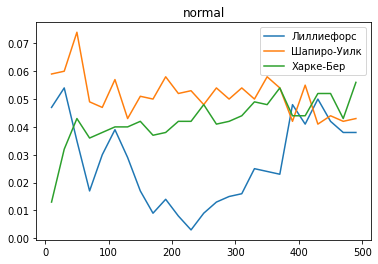

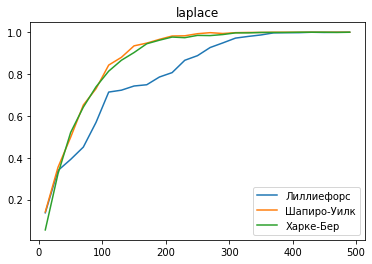

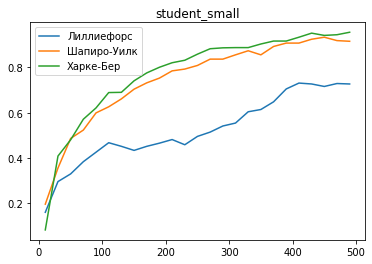

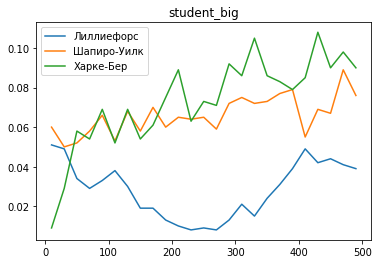

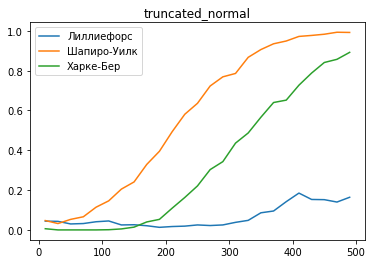

In [0]:
from functools import partial
from matplotlib import pyplot as plt
volume = np.arange(10, 500, 20)

for d in distributions:
  rejected_all = []
  for name, test in zip(['Лиллиефорс', 'Шапиро-Уилк', 'Харке-Бер'], [partial(lilliefors, dist='norm', pvalmethod='table'), st.shapiro, st.jarque_bera]):
    rejected = []
    for n in volume:
      counter = 0
      for _ in range(num_exp):
        samples = get_samples(n, d)
        if test(samples)[1] <= alpha:
          counter += 1
      rejected.append(counter/num_exp)
    rejected_all.append((name, rejected))
  for n, data in rejected_all:
    plt.plot(volume, data, label=n)
  plt.legend()
  plt.title(d)
  plt.show()
  


## Выводы
* Из первого графика можем судить о консервативности критериев. Так, тест Лиллиефорса консервативен, остальные тесты менее консервативны. Тест Шапиро-Уилка не консервативен.

* При распределениях, близких к нормальному (н-р Стьюдент с большим числом степеней свободы) мощность критериев падает.

* Критерий Шапиро-Уилка больше остальных чувствителен к хвостам (последний график).



# Задача 2.3

Известно, что электричка "Вашингтон-Петушки" аварийно останавливается раз в несколько дней. Аналитики РЖД проанализировали, сколько дней электричка едет без поломок, и составили выборку: x = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15).

РЖД хочет проверить гипотезу, что дисперсия распределения равна 9 против правосторонней альтернативы.

Требуется:

* Ввести предположение, каким распределением описывается данная выборка.
* Записать задачу формально.
* Предложить критерий для оценки дисперсии распределения.
* Проверить гипотезу о значении дисперсии распределения для уровня значимости $\alpha = 0.05$ аналитически.
* Вывести и получить доверительный интервал для значения дисперсии при $\alpha = 0.05$.

## Распределение
Если 
* обозначить день без поломки успехом для РЖД (или неудачей для ленивого машиниста), 
* а день с поломкой - неудачей для РЖД (успехом для лентяя-машиниста), 
* поломка в отдельно взятый лень - бернуллиевская случайная величина,
то дни без поломки - число идущих подряд успешных дней до первого неуспешного дня, или привычнее число неуспешных испытаний подряд в серии Бернулли до первого успеха. 
То есть выборка - из [геометрического распределения](https://ru.wikipedia.org/wiki/Геометрическое_распределение), $$P(X = n) =(1-p)^n p$$

$$\mathbb{E}(X) = \frac{1-p}{p} \quad \mathbb{V}(X) = \frac{1-p}{p^2}$$

## Формальная задача

$$ X \sim Geom(p)$$
$$ H_0: \mathbb{V}(X) = 9$$
$$ H_1: \mathbb{V}(X) \geq 9$$

Поскольку дисперсия дает квадратное уравнение, имеющие корни разных знаков (отрицательный свободный член), является убывающей функцией от вероятности, то задача эквивалентна следующей:

$$ X \sim Geom(p)$$
$$ H_0: p = p_0$$
$$ H_1: p < p_0$$



## Критерий

Поскольку не выполнена нормальность данных, то нужен соответствующий критерий, например, критерий меток.

Для него статистика имеет вид
$$Z\left(X^{n}\right)=\frac{S\left(\theta_{0}\right)}{\sqrt{I\left(\theta_{0}\right)}} \sim N(0, 1)$$

$$\begin{multline}S(p) = \frac{\partial}{\partial p} \log L(X^n, p) = \frac{\partial}{\partial p} \sum_1^n\log P(X_i | p) \\ = \frac{\partial}{\partial p} \sum_1^n \left(x_i \log(1-p) + \log p \right) = -\frac{n\overline{X}}{1-p} + \frac{n}{p}
\end{multline}$$

$$I(p)=-\mathbb{E} \frac{\partial^{2}}{\partial p^{2}} \log L(X^n, p) = \mathbb{E}\left[\frac{n\overline{X}}{(1-p)^2} + \frac{n}{p^2}\right] = n\left(\frac{1}{p^2} + \frac{1}{p(1-p)}\right) = \frac{n}{p^2(1-p)}$$

$$Z(X^n) = \sqrt{n}\left(\sqrt{1-p} - \frac{p\overline{X}}{\sqrt{1-p}}\right) = \dfrac{\mathbb{E}(X) - \overline{X}}{\sqrt{\frac{\mathbb{V}X}{n}}}$$

Уравение на $p_0$:
$$9p^2 + p - 1 = 0$$
$$p_0 = \frac{1 + \sqrt{37}}{18}$$




In [0]:
def z(p, x):
  expectation = (1 - p)/p
  variance = (1-p)/(p**2)
  mean = np.mean(x)

  return np.sqrt(len(x))*(expectation - mean)/np.sqrt(variance)

In [0]:
def p0():
  return (1+np.sqrt(37))/18

In [0]:
x = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15)

In [0]:
z_value = z(p0(), x)
print('z: {}'.format(z_value))
print('z_alpha: {}'.format(st.norm.ppf(0.05)))
# Достигаемый уровень значимости
st.norm.cdf(z_value)

z: -14.3136734169704
z_alpha: -1.6448536269514729


8.98808242910111e-47

Видим, что гипотезу можно смело отвергать.

# Доверительный интервал
Для построения доверительного интервала удобно использовать критерий Вальда. 

$$\frac{p_{MLE} - p_0}{\sqrt{\mathbb{V} p_{MLE}}} \sim N(0, 1)$$

$$p_{MLE} = \frac{n}{\sum_1^n x_i} \approx 0.095$$

$$p_0 \in \left[p_{M L E}-z_{1-\alpha / 2} \sqrt{I^{-1}\left(p_{M L E}\right)}, p_{M L E}+z_{1-\alpha / 2} \sqrt{I^{-1}\left(p_{M L E}\right)}\right]$$


In [0]:
def I(p, n):
  return n/(p**2 * (1-p))

In [0]:
def interval(x, alpha=0.05):
  p_mle = 1 / np.mean(x)
  z = st.norm.ppf(1-alpha/2)
  I_value = I(p_mle, len(x))
  return p_mle - z*np.sqrt(1/I_value), p_mle + z*np.sqrt(1/I_value)

In [0]:
inter = interval(x)
inter

(0.03909117426819991, 0.15138501620799055)

Для дисперсии (в силу ее монотонности от $p$) интервал есть:

In [0]:
(1-inter[1])/inter[1]**2, (1-inter[0])/inter[0]**2

(37.029249706360005, 628.8176877798868)

# Задача 3.2

Дана статистика бросков для игроков NBA

Выборка представляет собой статистику бросков для различных игроков NBA. Для каждого игрока известны:

* количество успешных бросков в домашних играх (score_home)
* количество бросков в домашних играх (atm_home)
* количество успешных бросков в гостевых играх (score_away)
* количество бросков в гостевых играх (atm_away)

Требуется определить, есть ли разница в успехе бросков у игроков в домашних и гостевых играх.

У какого процента игроков разница в успехе существенна?

In [2]:
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab1/data/nba.csv

--2020-03-25 18:07:09--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab1/data/nba.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34909 (34K) [text/plain]
Saving to: ‘nba.csv’

nba.csv             100%[===================>]  34.09K  --.-KB/s    in 0.01s   

2020-03-25 18:07:10 (2.40 MB/s) - ‘nba.csv’ saved [34909/34909]



In [0]:
data = pd.read_csv('nba.csv', index_col=0)

In [6]:
data.head()

,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
7,A. Johnson,ATL,30,34,24,28,64,52
10,A. Johnson,TOR,63,57,44,38,120,82
15,Abdur-Rahim,SAC,114,124,84,90,238,174
22,Afflalo,DEN,236,284,189,227,520,416
23,Afflalo,DET,75,88,62,67,163,129


In [0]:
data['home'] = data['score_home']/data['atm_home']
data['away'] = data['score_away']/data['atm_away']

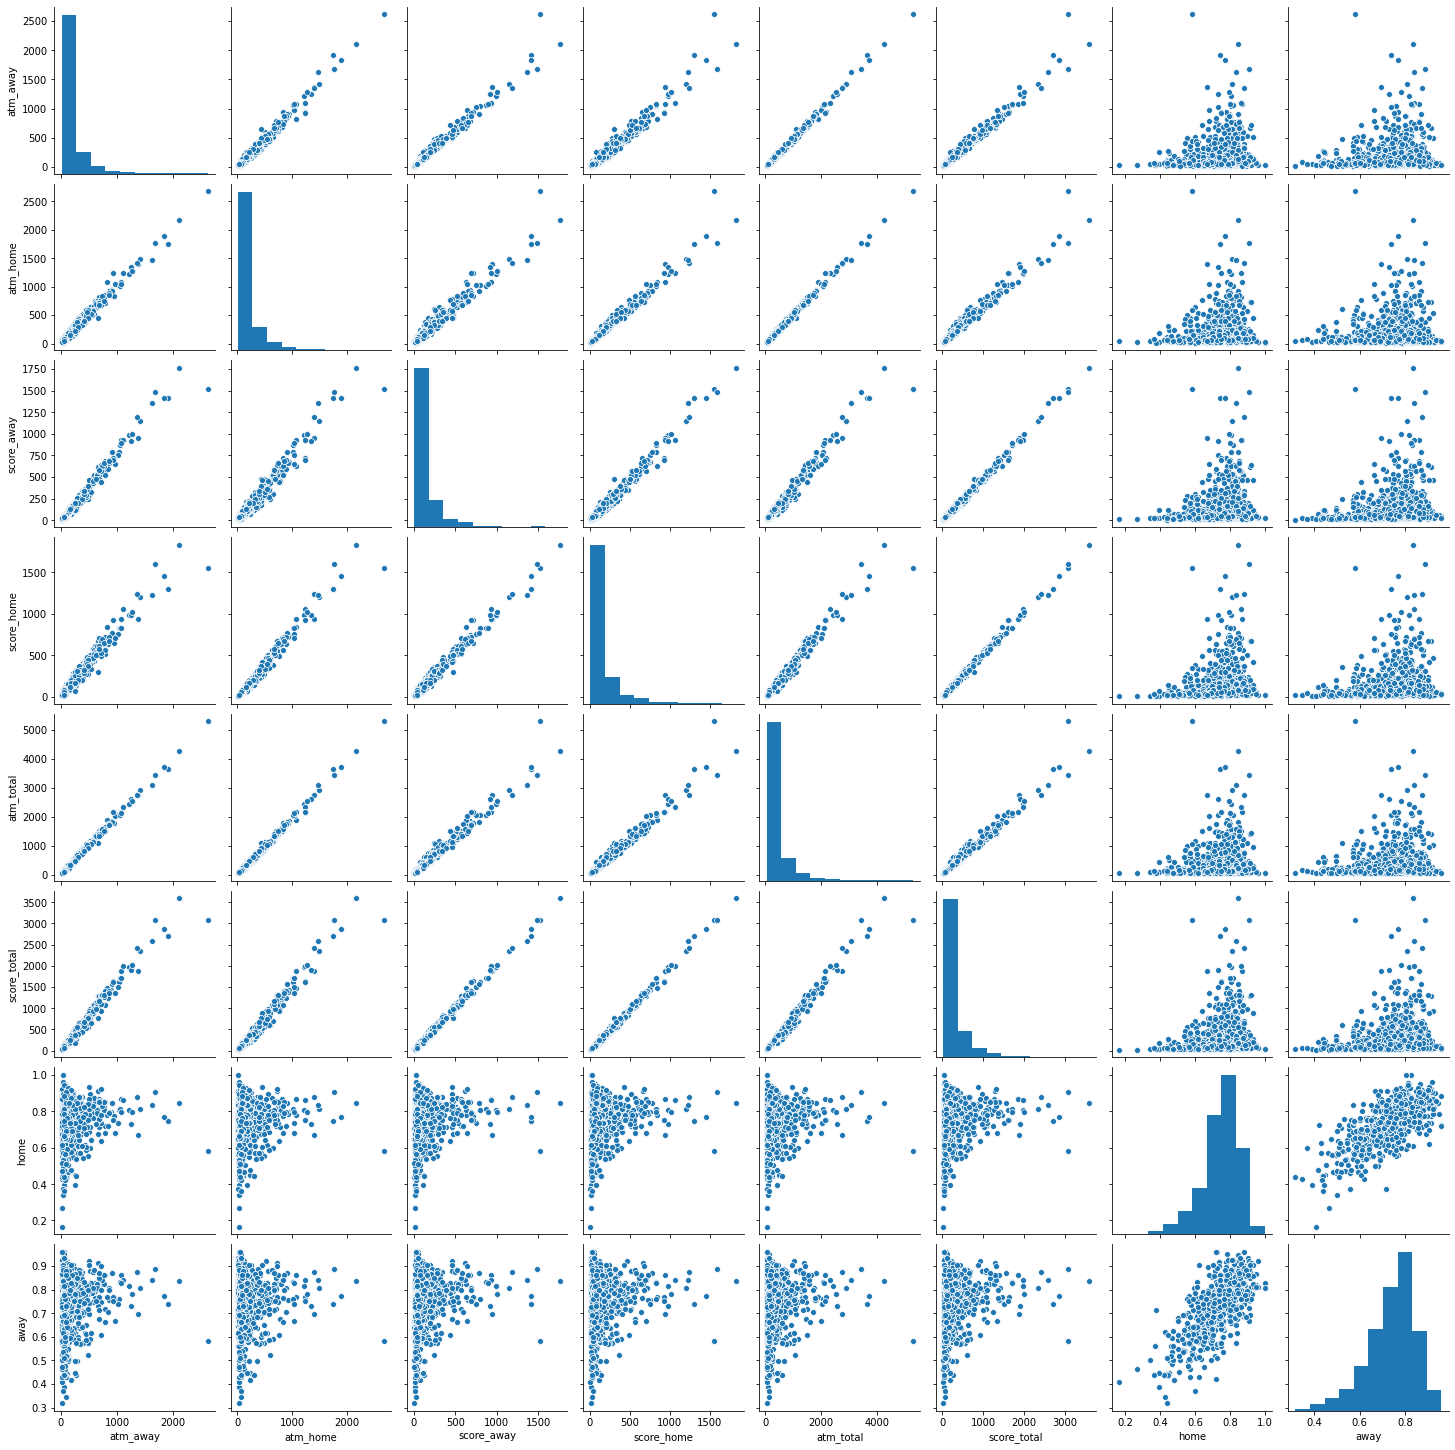

In [10]:
import seaborn as sns
sns.pairplot(data=data)

In [0]:
from statsmodels.stats.proportion import proportions_ztest
p_vals = []
for i, row in data.iterrows():
    count = row["score_away"], row["score_home"]
    nobs = row["atm_away"], row["atm_home"]
    p_vals.append(proportions_ztest(count, nobs, alternative="two-sided")[1])
p_vals = np.array(p_vals)

In [6]:
# число игроков, для которых броски дома и на выезде существенно отличаются (без поправки на многомерность)
sum(p_vals < 0.05)

65

Применим метод Холма, поскольку имеем дело с множественной проверкой гипотезой.

In [7]:
from statsmodels.stats.multitest import multipletests

multipletests(p_vals, alpha=0.05, method='holm')[0].sum()

0

In [8]:
multipletests(p_vals, alpha=0.05, method='fdr_bh')[0].sum()

0

In [0]:

from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('away ~ C(team) + home + C(team):home',  data=data).fit()


In [12]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   away   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.17
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          1.06e-124
Time:                        11:59:44   Log-Likelihood:                 1182.0
No. Observations:                 936   AIC:                            -2236.
Df Residuals:                     872   BIC:                            -1926.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0816      0.107      0.763      0.446      -0.128       0.291
C(team)[T.BOS]          0.1003      0.149      0.672      0.501      -0.192       0.393
C(team)[T.CHA]          0.1891      0.124      1.522      0.128      -0.055       0.433
C(team)[T.CHI]         -0.0470      0.139     -0.339      0.735      -0.319       0.225
C(team)[T.CLE]          0.0910      0.129      0.704      0.482      -0.163       0.345
C(team)[T.DAL]         -0.0022      0.143     -0.016      0.987      -0.282       0.278
C(team)[T.DEN]          0.2557      0.143      1.792      0.073      -0.024       0.536
C(team)[T.DET]          0.1583      0.133      1.193      0.233      -0.102       0.419
C(team)[T.GSW]          0.2165      0.135      1.602      0.110      -0.049       0.482
C(team)[T.HOU]          0.0758      0.157      0.485      0.628      -0.231       0.383
C(team)[T.IND]          0.1140      0.138      0.825      0.410      -0.157       0.385
C(team)[T.LAC]          0.1922      0.124      1.546      0.122      -0.052       0.436
C(team)[T.LAL]          0.0435      0.201      0.216      0.829      -0.351       0.438
C(team)[T.MEM]          0.2114      0.160      1.324      0.186      -0.102       0.525
C(team)[T.MIA]          0.0827      0.136      0.610      0.542      -0.183       0.349
C(team)[T.MIL]         -0.0274      0.131     -0.208      0.835      -0.285       0.230
C(team)[T.MIN]          0.2350      0.145      1.623      0.105      -0.049       0.519
C(team)[T.NJN]          0.0689      0.133      0.518      0.604      -0.192       0.330
C(team)[T.NOH]          0.0842      0.137      0.613      0.540      -0.185       0.354
C(team)[T.NOK]          0.0792      0.176      0.449      0.654      -0.267       0.425
C(team)[T.NYK]          0.2198      0.134      1.637      0.102      -0.044       0.483
C(team)[T.OKC]          0.1663      0.160      1.039      0.299      -0.148       0.480
C(team)[T.ORL]         -0.0649      0.168     -0.388      0.698      -0.394       0.264
C(team)[T.PHI]         -0.1530      0.167     -0.917      0.359      -0.481       0.175
C(team)[T.PHX]          0.2466      0.131      1.883      0.060      -0.010       0.504
C(team)[T.POR]          0.2109      0.146      1.449      0.148      -0.075       0.497
C(team)[T.SAC]          0.1217      0.156      0.778      0.437      -0.185       0.429
C(team)[T.SAS]          0.1557      0.155      1.006      0.314      -0.148       0.459
C(team)[T.SEA]          0.1044      0.232      0.451      0.652      -0.350       0.559
C(team)[T.TOR]          0.0569      0.140      0.405      0.685      -0.219       0.332
C(team)[T.UTA]         -0.0611      0.150     -0.407      0.684      -0.356       0.234
C(team)[T.WAS]          0.2540      0.132      1.920      0.055      -0.006       0.514
hom

Считаю, что команда влияет на соотношение между результативностью дома и на выезде, поэтому объединять данные по игрокам некорректно.

# Задача 4.1

Рассмотрим данные из табллицы 1 по числу заболевших и выздоровевших от короновируса в разных странах. Требуется проверить гипотезу о тому, что число выздоровевших людей в странах не зависит от числа заболевших в стране.

Требуется:

* записать задачу формально;
* предложить статистику для решения данной задачи;
* записать приближенно нулевое распределение данной статистики;
* записать явно правило принятия решения на основе статистики и нулевого 
распределения для обеспечения уровня значимости alpha = 0.05;
* проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезу?
на уровне значимости alpha = 0.05 найти зависимость мощности критерия в зависимости от истинного значения статистики.

In [3]:
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab1/data/corona.csv

--2020-03-25 18:07:18--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab1/data/corona.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616 [text/plain]
Saving to: ‘corona.csv’

corona.csv          100%[===================>]     616  --.-KB/s    in 0s      

2020-03-25 18:07:18 (127 MB/s) - ‘corona.csv’ saved [616/616]



In [8]:
data = pd.read_csv('corona.csv')
data

,Страна,заболевшие,выздоровевшие
0,германия,2078,25
1,дания,617,1
2,малайзия,149,26
3,австрия,302,4
4,ирак,71,15
5,китай,80932,62901
6,италия,12462,1045
7,сша,1663,12
8,сингапур,178,96
9,австралия,128,21


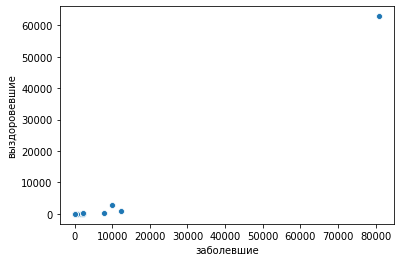

In [11]:
import seaborn as sns
sns.scatterplot(data=data, x='заболевшие', y='выздоровевшие') #Китай - выброс

Требуется проверить независимость числа выздоровевших от числа заболевших при малом количестве данных ($n=26$). При таком условии лучше подходит коэффициент корреляции Кендалдла (она точнее оценивается).



## Постановка

* $X_1^n = \left(X_{11}, \dots, X_{1n}\right)$ - заболевшие
* $X_2^n = \left(X_{21}, \dots, X_{n}\right)$ - выздоровевшие
* $H_0: \tau_{X_1 X_2} = 0$
* $H_1: \tau_{X_1 X_2} \neq 0$



## Статистика
$$\hat{\tau}_{X_{1} X_{2}}=1-\frac{4}{n(n-1)} \sum_{i=1}^{n-1} \sum_{j=1}^{n}\left[\left[X_{1 i}<X_{1 j}\right] \neq\left[X_{2 i}<X_{2 j}\right]\right]=\frac{C-D}{C+D}$$
* C - число согласованных пар,
* D - число несогласованных пар

При $n > 10$ ее можно аппроксимировать нормальным распределением $N\left(0, \frac{2(2n + 5)}{9n(n-1)}\right) \sim N\left(0, \frac{57}{2925}\right)$






## Решающее правило
Отвергнуть нулевую гипотезу, если
$$| \hat{\tau} | \geq \bar{\Phi}^{1-\alpha / 2},$$ где$$ \bar{\Phi}^{1-\alpha / 2} - \left(1-\frac{\alpha}{2}\right)-\text{квантиль распределения }\mathcal{N}\left(0, \frac{57}{2925}\right)$$

Тогда 
$$p(\hat{\tau})  = 2\left(1 - F(|\hat{\tau}|\right) \leq \alpha$$





In [0]:
from scipy import stats as st

In [14]:
res = st.kendalltau(data['заболевшие'].values, data['выздоровевшие'].values)
print(res)
alpha = 0.05
if res.pvalue <= 0.05:
  print('Гипотеза о независимости отвергается')
else:
  print('Гипотеза принимается')

KendalltauResult(correlation=0.28351110894619114, pvalue=0.044325607642096566)
Гипотеза о независимости отвергается


Учитывая, что Китай отличается от других стран большим опытом борьбы с инфекцией, интересно посмотреть на данные без Китая.

In [16]:
without_china = data.drop(labels=[5])
res = st.kendalltau(without_china['заболевшие'].values, without_china['выздоровевшие'].values)
print(res)
alpha = 0.05
if res.pvalue <= 0.05:
  print('Гипотеза о независимости отвергается')
else:
  print('Гипотеза принимается')

KendalltauResult(correlation=0.22299333487183037, pvalue=0.12212105747986692)
Гипотеза принимается


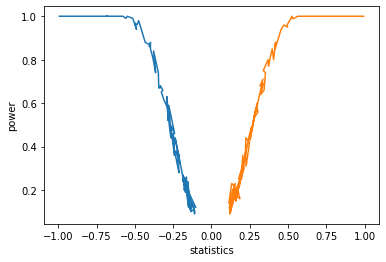

In [19]:
## Мощность как функция от статистики
from matplotlib import pyplot as plt



num_exp = 100

for coef in [-1, 1]:
  t = []
  p = []
  for noise in np.linspace(0.01, 5, 100):
    tau = []
    rejected = 0
    for _ in range(num_exp):
      X1 = np.random.randn(26)
      X2 = coef*X1 + noise*np.random.randn(26)

      res = st.kendalltau(X1, X2)
      tau.append(res[0])
      if res[1] <= alpha:
        rejected += 1
    t.append(np.mean(tau))
    p.append(rejected/num_exp)
  plt.plot(t, p)

plt.xlabel('statistics')
plt.ylabel('power')
plt.show()





